# Summary
### I applied an ensemble of machine learning using python and anomaly detection techniques using excel for this project. For the ML approach, I developed models using different algorithms. I believe this is a good approach to detect and prevent fraud


# LOADING DATA & DATA FILTERING

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from numpy.random import default_rng

from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('1st_adyen_rides-success-and-fail.csv') 
df.drop(['name'], axis = 1, inplace = True)

In [2]:
df

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,order_try_id,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,card_bin,failed_attempts
0,2016-01-23 23:10:07,motorolaXT1562,motorola6.0.1,ee,2.0,58.378220,26.710402,58.363243,26.737696,218,...,4054895,773,3017,4.5000,4.5000,ok,NaN,1,NaN,0
1,2016-05-04 06:01:32,iPhone6,iOS10.3.3,ee,1.0,59.424130,24.646359,59.397548,24.660957,266,...,5129745,43,4241,4.4000,4.4000,ok,NaN,1,NaN,0
2,2016-08-27 16:42:22,HTCHTC 10,HTC7.0,ee,1.0,59.413508,24.743706,59.448500,24.804887,551,...,6792534,1654,6347,7.2000,7.2000,ok,NaN,1,516903.0,0
3,2016-10-25 07:14:27,iPhone6S,iOS10.3.2,ee,1.0,59.419938,24.744795,59.431686,24.720801,798,...,8103655,883,2638,3.1000,3.1000,ok,NaN,1,541747.0,0
4,2016-09-09 12:46:47,"iPhone5,2",iOS9.3.4,ee,1.0,59.471328,24.890557,59.427836,24.774460,944,...,7039724,1109,10288,9.0999,9.0999,ok,NaN,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304048,2017-06-21 05:05:50,iPhone6S,iOS10.2.1,za,54.0,-25.746974,28.114173,-25.748204,28.132867,1916704,...,22232701,2640,3334,40.0000,40.0000,ok,NaN,1,523982.0,0
304049,2017-07-03 12:34:48,iPhone6,iOS10.3.2,ge,15.0,41.709336,44.802954,41.693171,44.803201,2017910,...,23656809,608,3959,4.4000,4.4000,ok,NaN,1,431572.0,0
304050,2017-07-25 14:00:26,BoostShaker-Slim,Boost4.4.2,za,54.0,-26.077051,28.084813,-26.095041,28.080559,2086329,...,26088621,1566,2936,30.0000,30.0000,ok,NaN,1,425668.0,0
304051,2017-07-30 14:11:14,iPhone6,iOS10.3.2,ro,325.0,44.441192,26.020226,44.435512,26.116617,2161013,...,26739674,1723,9708,23.8999,23.8999,ok,NaN,1,554593.0,0


In [3]:
# Helper function to plot distribution, probability plot, and outliers. 
# This helps to check deciding how to impute missing data for numerical variables.
def hist_QOutlier(df, variable):
    """
    Implement function to visualize distribution curve, probability plot, and outlier
    --------------------------------------------------------------------------
    Arguments:
    df: DataFrame
    variable: features in dataframe that has missing values
    --------------------------------------------------------------------------
    Returns:
    plots
    """
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a correlated variable 
    for i in variable:
        plt.figure(figsize=(15,6))
        plt.subplot(1, 3, 1)
        sns.distplot(x = df[i])
        plt.title(i)

        plt.subplot(1, 3, 2)
        stats.probplot(df[i], dist="norm", plot=plt)
        
        plt.subplot(1, 3, 3)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')
        

        plt.show()

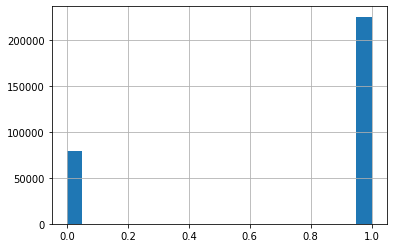

In [4]:
df.is_successful_payment.hist(bins=20);

In [5]:
df['is_successful_payment'].value_counts()

1    225020
0     79033
Name: is_successful_payment, dtype: int64

In [6]:
df = df.drop(df.query('is_successful_payment == 1').sample(frac=.64).index)

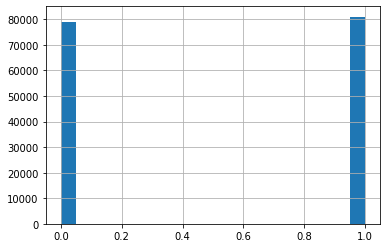

In [7]:
# Balancing Dataset
df.is_successful_payment.hist(bins=20);

<b> Separating Categorical Features from Numerical Features </b>

In [8]:
# Note: is_successful_payment == Target

# numeric
numeric = [var for var in df.columns if df[var].dtype!='O' and var!='is_successful_payment']


# categorical
categorical = [var for var in df.columns if df[var].dtype=='O' and var!='is_successful_payment']

print('There are {} continuous variables'.format(len(numeric)))
print('There are {} categorical variables'.format(len(categorical)))

There are 14 continuous variables
There are 6 categorical variables


# FEATURE ENGINEERING

<b> Missing Data Imputation </b>. <br> Dataset shows that numeric data was completely missing at random (MCAR). 
    Results indicates that there are four(4) features with missing values, less than 3%. 
    Therefore, either mean or median imputation is considered depending on data distribution.</br>

In [9]:
# Handling numerical variables

# Percentage of missing values in numerical variables
df[numeric].isnull().mean() * 100

city_id                 0.118720
lat                     0.000000
lng                     0.000000
real_destination_lat    0.006873
real_destination_lng    0.006873
user_id                 0.000000
order_id                0.000000
order_try_id            0.000000
distance                0.000000
ride_distance           0.000000
price                   0.000000
ride_price              0.000000
card_bin                2.753062
failed_attempts         0.000000
dtype: float64

Plots distribution below shows that datas was mostly skewed. Therefore, median imputation is considered. 

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


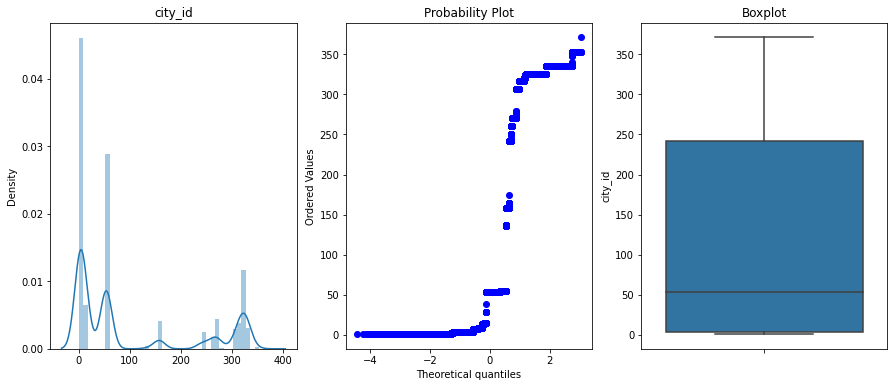

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


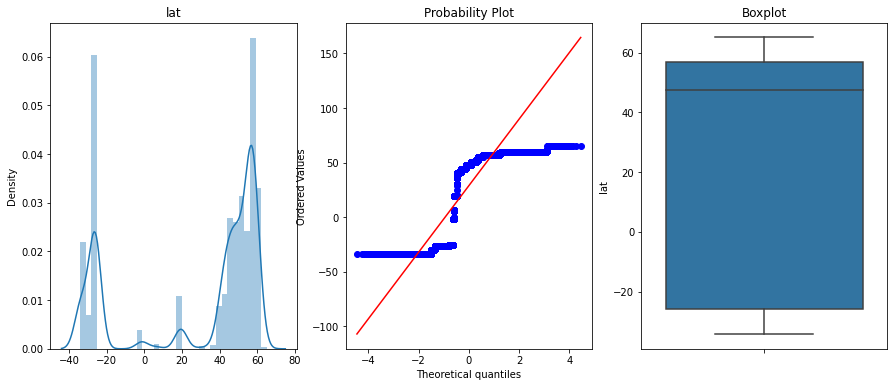

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


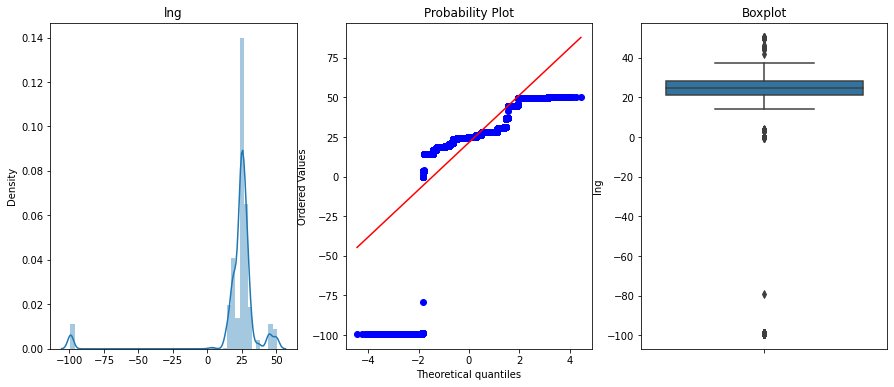

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


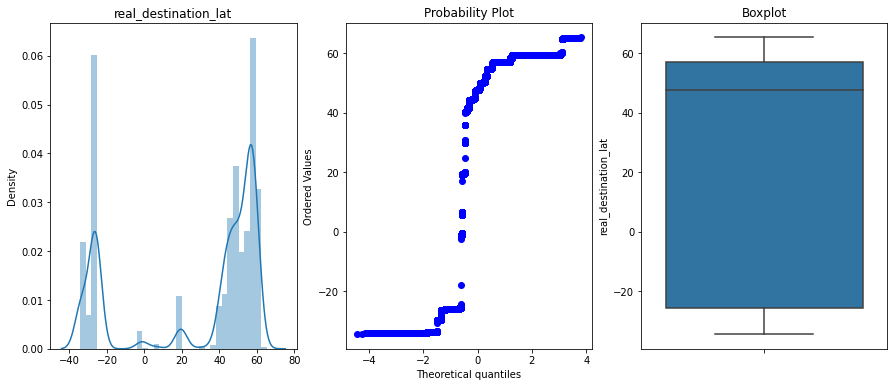

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


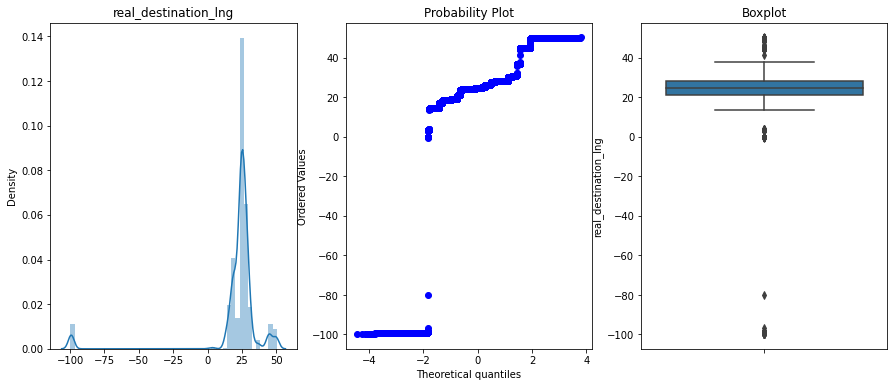

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


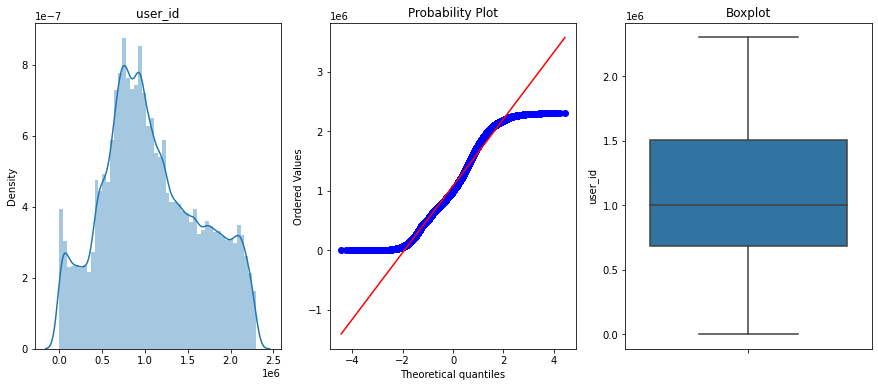

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


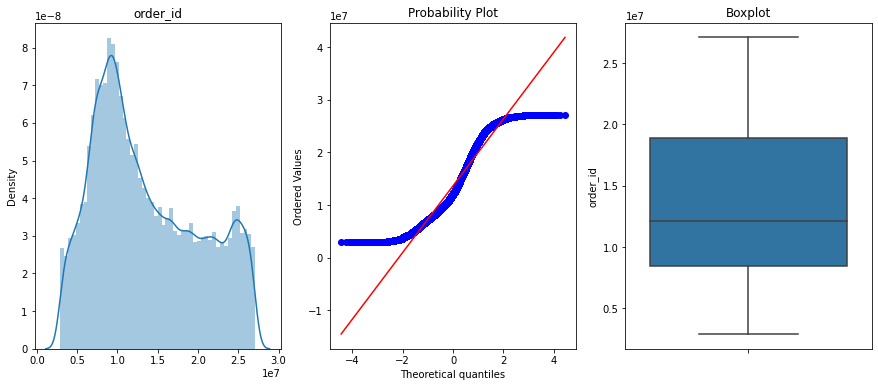

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


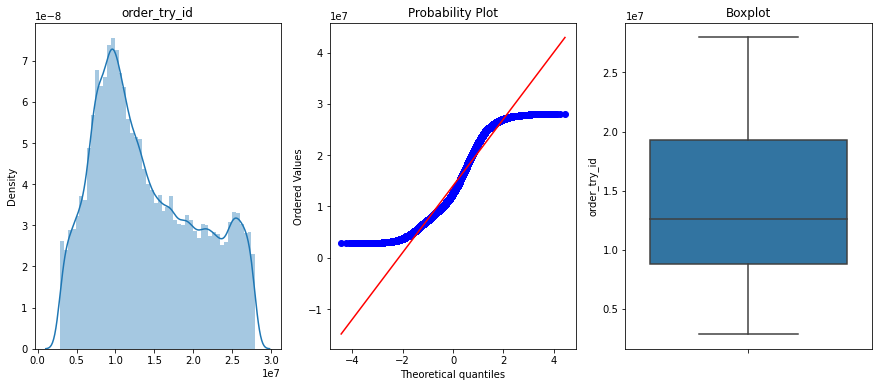

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


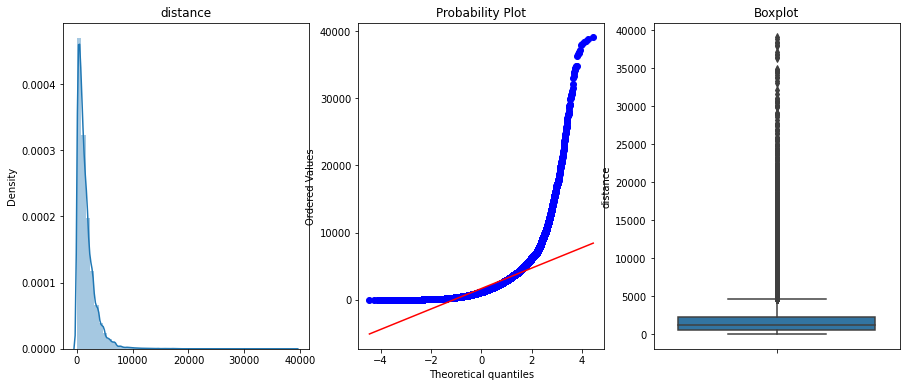

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


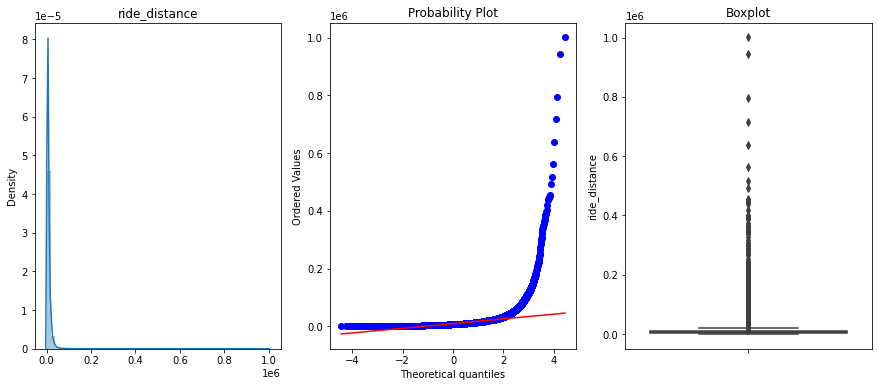

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


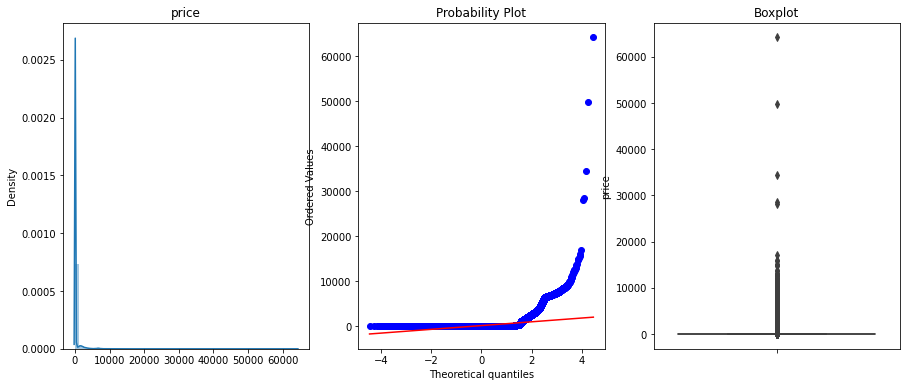

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


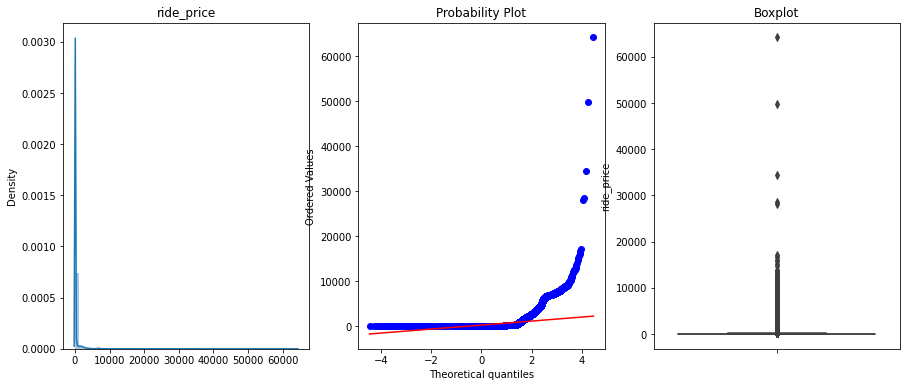

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


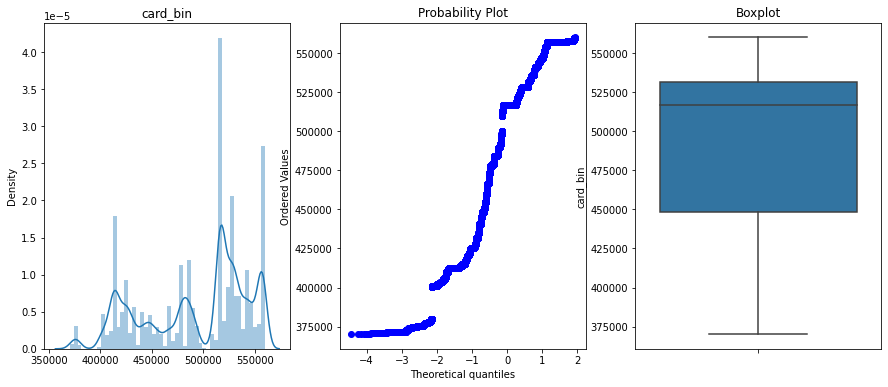

C:\Users\seyia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


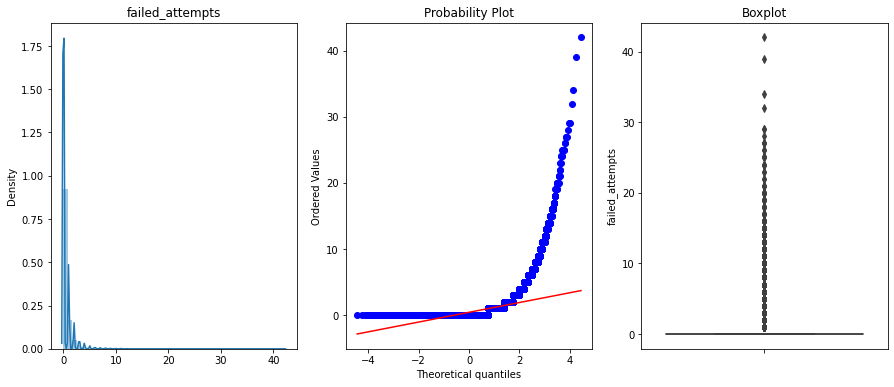

In [10]:
hist_QOutlier(df[numeric], numeric)

<b> Splitting Dataset before Imputation to follow best practices </b>

In [11]:
df['is_successful_payment'].unique()

# drop target variable ('is_successful_payment') and split the dataset into train and test 

df_copy = df.copy()     # Create a copy of the dataset
target = df['is_successful_payment']   # Create an instance of the target variable
df.drop(['is_successful_payment'], axis = 1, inplace = True)

# Split into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.20, random_state = 42)

<b> Use Feature-Engine Library for Imputations </b>

In [12]:
from feature_engine.imputation import MeanMedianImputer

median_imputer = MeanMedianImputer(imputation_method='median',variables=['city_id', 'real_destination_lat',
                                                                        'real_destination_lng', 'card_bin'])
median_imputer.fit(X_train)
train_imputed = median_imputer.transform(X_train)
test_imputed = median_imputer.transform(X_test)

<b> Dealing with missing values in the Categorical variables. </b> <br> Over 99% of the data in price_review_reason is missing. Therefore, we drop the feature. In addition, we impute the mode for the country feature.</br>

In [13]:
train_imputed[categorical].isnull().mean() * 100

created                 0.000000
device_name             0.000000
device_os_version       0.000000
country                 0.000781
price_review_status     0.000000
price_review_reason    99.497001
dtype: float64

In [14]:
train_imputed['country'].value_counts() # za is the mode

za    34333
lv    22817
ee    14587
lt     9198
ro     8511
hu     7099
cz     4812
ge     4349
ua     4340
mx     4214
az     3398
pl     3332
sk     2570
rs     1926
ke     1473
ng      361
mt      309
eg      231
fi      129
gh       40
ca        1
sa        1
Name: country, dtype: int64

In [15]:
from feature_engine.imputation import CategoricalImputer

mode_imputer = CategoricalImputer(imputation_method = 'frequent', fill_value = 'za', variables = ['country'])
mode_imputer.fit(X_train)

train_imputed = mode_imputer.transform(train_imputed)
test_imputed = mode_imputer.transform(test_imputed)

In [17]:
# drop the price_review_reason form the train and test set

train_imputed.drop(['price_review_reason', 'created'], axis = 1, inplace = True)
test_imputed.drop(['price_review_reason', 'created'], axis = 1, inplace = True)

In [18]:
train_imputed['device_name'].value_counts()

iPhone6                       10033
iPhone6S                       9802
iPhone7                        8164
iPhone5S                       6754
iPhoneSE                       3876
                              ...  
TECNOTECNO DP8D                   1
P9+P9+                            1
LenovoLenovo A526                 1
AG_Chrome_Go_Tab_7.0_3GAG7        1
motorolaMoto E (4)                1
Name: device_name, Length: 3131, dtype: int64

In [19]:
train_imputed['device_os_version'].value_counts()

iOS10.3.2             20679
samsung6.0.1          12506
iOS10.3.3              9441
samsung7.0             7967
iOS10.2.1              7815
                      ...  
PPTV5.1                   1
CellC6.0                  1
Sony Ericsson2.3.4        1
GOCLEVER4.4.2             1
Nomi4.4.2                 1
Name: device_os_version, Length: 970, dtype: int64

In [22]:
train_imputed['country'].value_counts()

za    34334
lv    22817
ee    14587
lt     9198
ro     8511
hu     7099
cz     4812
ge     4349
ua     4340
mx     4214
az     3398
pl     3332
sk     2570
rs     1926
ke     1473
ng      361
mt      309
eg      231
fi      129
gh       40
ca        1
sa        1
Name: country, dtype: int64

In [23]:
train_imputed['price_review_status'].value_counts()

ok            127992
requested         22
not_solved        18
Name: price_review_status, dtype: int64

In [24]:
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder

oneHot_imputer = OneHotEncoder(top_categories=3, variables = ['price_review_status'])
oneHot_imputer.fit(train_imputed)
train_imputed = oneHot_imputer.transform(train_imputed)
test_imputed = oneHot_imputer.transform(test_imputed)

ordinal_encoder = OrdinalEncoder(encoding_method = 'ordered', variables = ['country'])
ordinal_encoder.fit(train_imputed, y_train)
train_imputed = ordinal_encoder.transform(train_imputed)
test_imputed = ordinal_encoder.transform(test_imputed)

In [26]:
train_imputed

,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,order_id,order_try_id,distance,ride_distance,price,ride_price,card_bin,failed_attempts,price_review_status_ok,price_review_status_requested,price_review_status_not_solved
92772,samsungSM-G900F,samsung6.0.1,16,3.0,56.900007,24.083572,56.955517,24.119031,1027022,11133528,11566656,3382,8597,0.6999,5.7000,516897.0,0,1,0,0
223125,XiaomiRedmi 4X,Xiaomi6.0.1,11,325.0,44.466138,26.058550,44.431463,26.030062,1506291,15834597,16235990,776,6911,15.1999,15.1999,517045.0,0,1,0,0
132620,XiaomiRedmi 3S,Xiaomi6.0.1,15,55.0,-33.948695,18.476091,-33.987853,18.488133,1591469,16885409,17284690,300,5880,0.0000,55.0000,484162.0,0,1,0,0
16192,iPhone7Plus,iOS10.3.3,18,15.0,41.723863,44.748131,41.708897,44.780110,342115,8359406,8623101,89,4027,4.0000,4.0000,415479.0,0,1,0,0
105461,XiaomiRedmi 3X,Xiaomi6.0.1,16,3.0,56.947543,24.123764,56.946075,24.107879,1051721,10398066,10812604,1297,1610,0.0000,2.0000,535420.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224450,samsungSM-G955F,samsung7.0,16,3.0,56.923887,24.040765,56.943430,24.112943,242495,26416733,27188809,291,5929,5.5999,5.5999,516897.0,0,1,0,0
191612,samsungSM-A510F,samsung6.0.1,11,325.0,44.463012,26.058275,44.441043,26.101310,1212074,12222915,12652268,516,5093,0.0000,11.1500,420957.0,0,1,0,0
247119,samsungSM-G610F,samsung6.0.1,15,54.0,-26.080545,28.201010,-26.135103,28.231286,2197457,25812681,26528958,1274,10996,0.0000,95.0000,404307.0,2,1,0,0
277163,iPhone6S,iOS10.3.2,9,335.0,40.366632,49.815441,40.368478,49.837471,2184741,25640871,26349461,2719,3116,1.8400,1.8400,510307.0,0,1,0,0


Due to high cardinality device_name, and device_os_version will be dropped in this preliminary analysis.
<br> Although they can be taken care of in future works. </br>

In [27]:
train_imputed.drop(['device_name', 'device_os_version'], axis = 1, inplace = True)
test_imputed.drop(['device_name', 'device_os_version'], axis = 1, inplace = True)

<b> Data Normalization </b>

In [28]:
train_stats = train_imputed.describe()

def norm(x):
    return (x - train_stats.T['mean']) / train_stats.T['std']


# normalize the train set
norm_train_imputed = norm(train_imputed)
    
# normalize the test set
norm_test_imputed = norm(test_imputed)

# Feature Selection

In [31]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

sel = VarianceThreshold(threshold=0.1)  # 0.1 indicates 99% of observations approximately

sel.fit(norm_train_imputed)  # fit finds the features with low variance
sum(sel.get_support())

18

<b> The mutual dependence plot shows price as the most dependent on the target </b>

<AxesSubplot:>

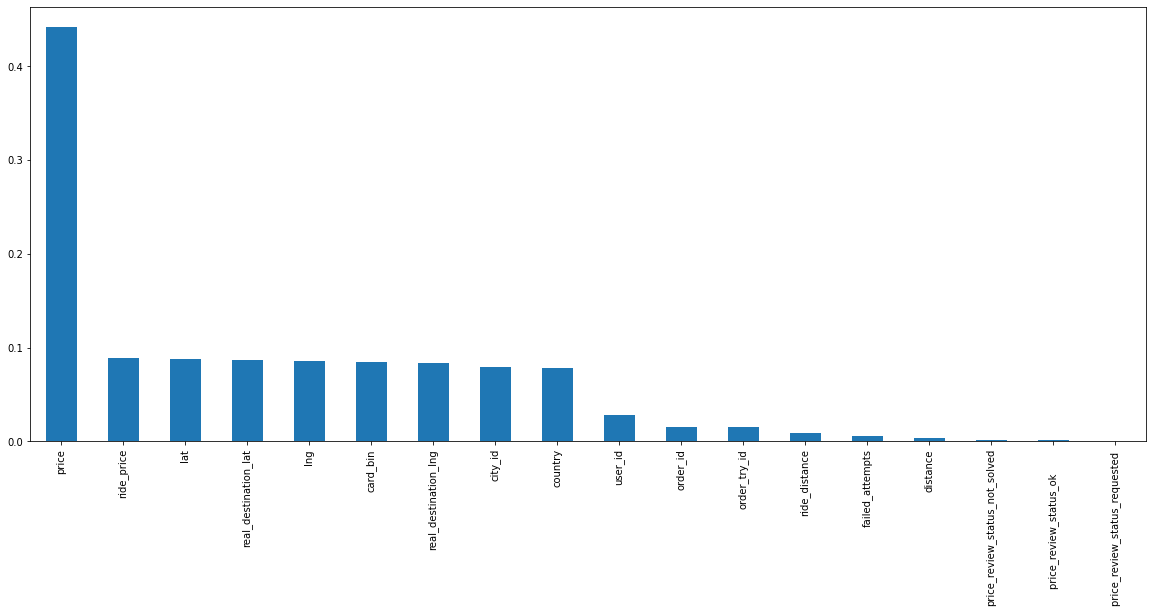

In [32]:
# Mutual dependency ranking

mi = mutual_info_classif(norm_train_imputed, y_train)
mi = pd.Series(mi)
mi.index = norm_train_imputed.columns
# mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Selecting the features based on the mutual information shows seven (7) features which all have mutual dependencies > 0.05

In [33]:
# Selecting features based on the mutual_info_classification
sel_ = SelectKBest(mutual_info_classif, k=7).fit(norm_train_imputed, y_train)
norm_train_imputed.columns[sel_.get_support()]

Index(['lat', 'lng', 'real_destination_lat', 'real_destination_lng', 'price',
       'ride_price', 'card_bin'],
      dtype='object')

Feature Importance based on ROC_VALUES also relates to the mutual info and mutual dependence

In [35]:
roc_values = []
for feature in norm_train_imputed.columns:
    clf = DecisionTreeClassifier()
    clf.fit(norm_train_imputed[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(norm_test_imputed[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
roc_values = pd.Series(roc_values)
roc_values.index = norm_train_imputed.columns
roc_values.sort_values(ascending=False)

price                             0.927455
ride_price                        0.712667
city_id                           0.707083
card_bin                          0.706437
country                           0.701332
lat                               0.604511
real_destination_lat              0.599377
lng                               0.585947
real_destination_lng              0.577765
failed_attempts                   0.529296
user_id                           0.527398
ride_distance                     0.521977
distance                          0.515883
order_try_id                      0.513115
order_id                          0.512910
price_review_status_ok            0.500382
price_review_status_requested     0.500255
price_review_status_not_solved    0.500127
dtype: float64

<AxesSubplot:>

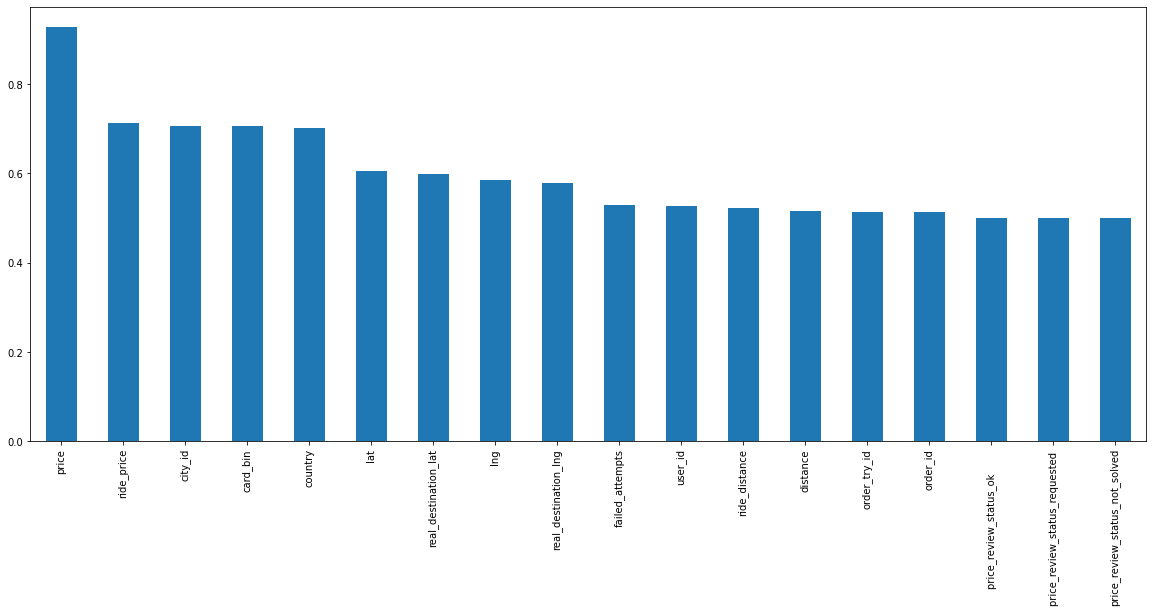

In [36]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

<b>Select features using the impotance derived from decision trees, and random forests </b>

In [37]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver = 'liblinear'))
sel_.fit(norm_train_imputed, y_train)
selected_col = norm_train_imputed.columns[(sel_.get_support())]
print(f'total features: {norm_train_imputed.shape[1]}')
print(f'selected features: {len(selected_col)}')

total features: 18
selected features: 17


In [38]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=400))
sel_.fit(norm_train_imputed, y_train)

# remove features with zero coefficient from dataset
X_train_rf = pd.DataFrame(sel_.transform(norm_train_imputed))
X_test_rf = pd.DataFrame(sel_.transform(norm_train_imputed))

# add the columns name
X_train_rf.columns = norm_train_imputed.columns[(sel_.get_support())]
X_test_rf.columns = norm_train_imputed.columns[(sel_.get_support())]

X_train_rf.shape, X_test_rf.shape

((128032, 1), (128032, 1))

In [39]:
X_train_rf.columns

Index(['price'], dtype='object')

# Model Development

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [41]:
norm_train_imputed

,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,order_id,order_try_id,distance,ride_distance,price,ride_price,card_bin,failed_attempts,price_review_status_ok,price_review_status_requested,price_review_status_not_solved
92772,0.469983,-0.780853,0.782437,0.107411,0.783964,0.108896,-0.099741,-0.386180,-0.367321,0.940776,-0.066512,-0.233812,-0.262067,0.461997,-0.354808,0.017678,-0.01311,-0.011858
223125,-0.733547,1.768727,0.436631,0.192133,0.435640,0.190880,0.746111,0.335404,0.332643,-0.473862,-0.204338,-0.216903,-0.251064,0.464946,-0.354808,0.017678,-0.01311,-0.011858
132620,0.229277,-0.369120,-1.744208,-0.133135,-1.745395,-0.132669,0.896439,0.496696,0.489850,-0.732254,-0.288619,-0.234628,-0.204967,-0.190230,-0.354808,0.017678,-0.01311,-0.011858
16192,0.951395,-0.685838,0.360365,0.993868,0.359918,0.995256,-1.308518,-0.811989,-0.808580,-0.846793,-0.440096,-0.229963,-0.264035,-1.558703,-0.354808,0.017678,-0.01311,-0.011858
105461,0.469983,-0.780853,0.783759,0.109135,0.783702,0.108418,-0.056150,-0.499068,-0.480359,-0.191043,-0.637679,-0.234628,-0.266352,0.831058,-0.354808,0.017678,-0.01311,-0.011858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224450,0.469983,-0.780853,0.783101,0.105575,0.783628,0.108635,-1.484336,1.959693,1.974543,-0.737139,-0.284613,-0.228098,-0.262182,0.461997,-0.354808,0.017678,-0.01311,-0.011858
191612,-0.733547,1.768727,0.436545,0.192121,0.435906,0.193936,0.226853,-0.218966,-0.204581,-0.615000,-0.352954,-0.234628,-0.255754,-1.449557,-0.354808,0.017678,-0.01311,-0.011858
247119,0.229277,-0.377038,-1.525383,0.284039,-1.526991,0.285312,1.965935,1.866975,1.875627,-0.203528,0.129599,-0.234628,-0.158639,-1.781299,1.330694,0.017678,-0.01311,-0.011858
277163,-1.214959,1.847907,0.322618,1.211243,0.322638,1.212217,1.943492,1.840603,1.848719,0.580874,-0.514568,-0.232482,-0.266537,0.330695,-0.354808,0.017678,-0.01311,-0.011858


In [42]:
# Logistic Regression

model = LogisticRegression()

train_used = norm_train_imputed[['lat', 'lng', 'real_destination_lat', 'real_destination_lng', 'price',
                                 'ride_price', 'card_bin']]
model.fit(train_used, y_train)

LogisticRegression()

In [43]:
test_used = norm_test_imputed[['lat', 'lng', 'real_destination_lat', 'real_destination_lng', 'price',
                               'ride_price', 'card_bin']]
model.score(test_used, y_test)
print('Logistic Model Accuracy : ', model.score(test_used, y_test)*100, '%')

Logistic Model Accuracy :  66.24281429642589 %



Confusion matrix :


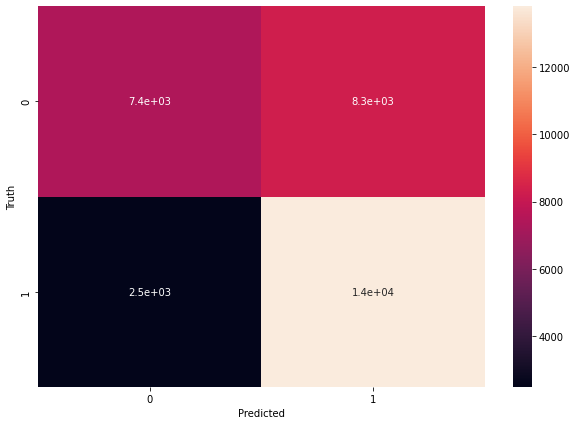

In [44]:
y_hat = model.predict(test_used)
print('\nConfusion matrix :')
cm = confusion_matrix(y_test, y_hat)

def confusionMatrix(a):
    plt.figure(figsize = (10, 7))
    sns.heatmap(a, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    
confusionMatrix(cm)

In [45]:
def report(test, predict):
    print('\nClassification report:')      
    print(classification_report(test, predict))
    
report(y_test, y_hat)


Classification report:
              precision    recall  f1-score   support

           0       0.75      0.47      0.58     15709
           1       0.62      0.85      0.72     16299

    accuracy                           0.66     32008
   macro avg       0.69      0.66      0.65     32008
weighted avg       0.69      0.66      0.65     32008



In [46]:
# Decison Tree

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(train_used, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(test_used, y_test)*100, '%')

yhat = decision_model.predict(test_used)

Decision Tree Model Accuracy :  91.70519870032491 %



Confusion matrix :


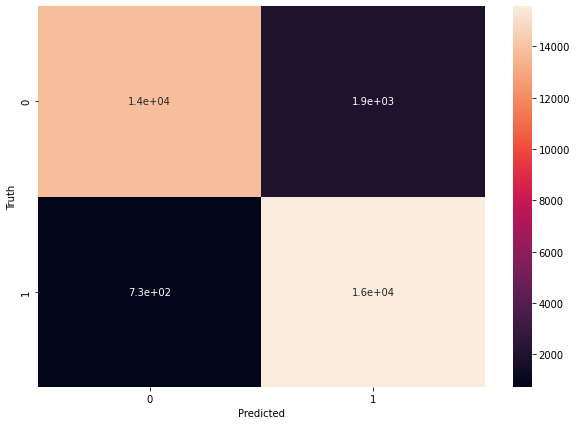

In [47]:
print('\nConfusion matrix :')
cm = confusion_matrix(y_test, yhat)
confusionMatrix(cm)

In [48]:
report(y_test, yhat)


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     15709
           1       0.89      0.96      0.92     16299

    accuracy                           0.92     32008
   macro avg       0.92      0.92      0.92     32008
weighted avg       0.92      0.92      0.92     32008



In [49]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

rf_model.fit(train_used, y_train)

print('Random Forest Model Accuracy : ', rf_model.score(test_used, y_test)*100, '%')

prediction = rf_model.predict(test_used)

Random Forest Model Accuracy :  91.9645088727818 %



Confusion matrix :
[[13584  2125]
 [  447 15852]]


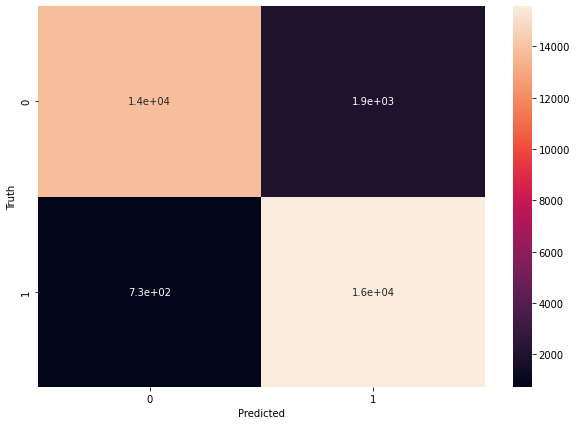

In [50]:
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
confusionMatrix(cm)

In [51]:
report(y_test, prediction)


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15709
           1       0.88      0.97      0.92     16299

    accuracy                           0.92     32008
   macro avg       0.92      0.92      0.92     32008
weighted avg       0.92      0.92      0.92     32008



In [52]:
# Support Vector Machine Classifier

svc_model = SVC()

svc_model.fit(train_used, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(test_used, y_test)*100, '%')

prediction = svc_model.predict(test_used)

Support Vector Classifier Accuracy :  71.26343414146463 %



Confusion matrix :


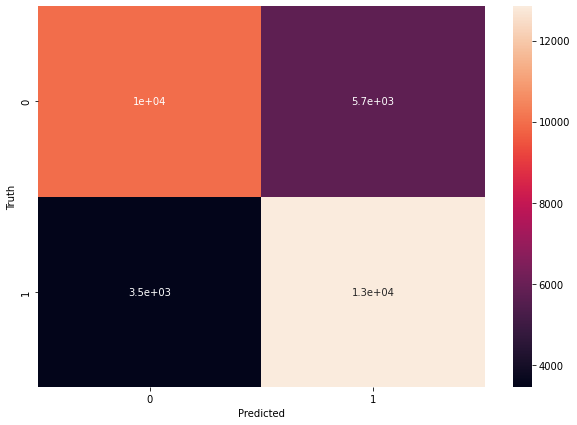

In [53]:
print('\nConfusion matrix :')
confusion_m = confusion_matrix(y_test, prediction)
confusionMatrix(confusion_m)

In [54]:
report(y_test, prediction)


Classification report:
              precision    recall  f1-score   support

           0       0.74      0.63      0.68     15709
           1       0.69      0.79      0.74     16299

    accuracy                           0.71     32008
   macro avg       0.72      0.71      0.71     32008
weighted avg       0.72      0.71      0.71     32008



In [55]:
# Naive Bayes

gnb = GaussianNB()
gnb.fit(train_used, y_train)

print('Gaussian Naive Bayes model accuracy : ', gnb.score(test_used, y_test)*100, '%')
 
# making predictions on the testing set
Prediction = gnb.predict(test_used)

Gaussian Naive Bayes model accuracy :  54.06773306673331 %



Confusion matrix :


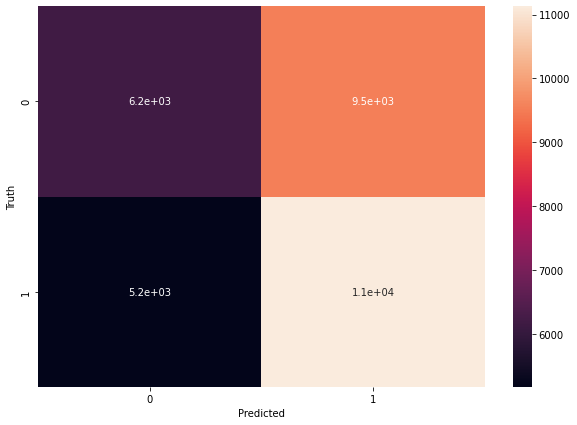

In [56]:
print('\nConfusion matrix :')
confusion_m = confusion_matrix(y_test, Prediction)
confusionMatrix(confusion_m)

In [57]:
report(y_test, Prediction)


Classification report:
              precision    recall  f1-score   support

           0       0.54      0.39      0.46     15709
           1       0.54      0.68      0.60     16299

    accuracy                           0.54     32008
   macro avg       0.54      0.54      0.53     32008
weighted avg       0.54      0.54      0.53     32008



<b>xgboost</b>

In [ ]:
from xgboost import XGBClassifier
model =  XGBClassifier()
model.fit(train_used, y_train)
y_predict = model.predict(test_used)
# print("Accuracy = " , accuracy_score(y_val, y_predict))
# print("F1 = " , f1_score(y_val, y_predict))

In [60]:
print("Accuracy = " , accuracy_score(y_test, y_predict))

Accuracy =  0.9219882529367658


<b>Adaboost</b>

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

clf = AdaBoostClassifier(n_estimators=500,
                         learning_rate=1)
# Train Adaboost Classifer
model = clf.fit(train_used, y_train)

#Predict the response for test dataset
y_pred = model.predict(test_used)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9160834791302175


### The algorithm reached a 92% test accuracy using XGBoost, making this ML algorithm a desirable route for detecting fraudsters using the available dataset. 
